In [17]:
import os

import pandas as pd
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [18]:
from numpy import load

data = '../Data/musicnet.npz'
#lst = data.files
with load(data,allow_pickle=True) as items:
    print(items)
    print(items.files)


NpzFile '../Data/musicnet.npz' with keys: 1788, 1789, 2659, 2127, 1818...
['1788', '1789', '2659', '2127', '1818', '1819', '2614', '2138', '2297', '2131', '1812', '1775', '2322', '1777', '1776', '1771', '2325', '1772', '2486', '2487', '2564', '2529', '2528', '2480', '2481', '2154', '2155', '2156', '2157', '2150', '2151', '2244', '1752', '2247', '2158', '2159', '2242', '2243', '2466', '1759', '2462', '2463', '1793', '1792', '1791', '1790', '2562', '1757', '2210', '2619', '2106', '1859', '2294', '1755', '2555', '2550', '1829', '1828', '2318', '2319', '2491', '1824', '2314', '2315', '2313', '2310', '1822', '2411', '2397', '2392', '2393', '2390', '2140', '2283', '2194', '1750', '2149', '2148', '2477', '2476', '2492', '2473', '2472', '2471', '2289', '2147', '2557', '2568', '2494', '2209', '1922', '1923', '2497', '2542', '2540', '2195', '2556', '2410', '2300', '2303', '2302', '2305', '2304', '2307', '2228', '2381', '2177', '2383', '2382', '2384', '2389', '2415', '2178', '2179', '2077', '2076

In [19]:
metadata_df =pd.read_csv('../Data/musicnet_metadata.csv')

In [20]:
metadata_df.head()

,id,composer,composition,movement,ensemble,source,transcriber,catalog_name,seconds
0,1727,Schubert,Piano Quintet in A major,2. Andante,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,447
1,1728,Schubert,Piano Quintet in A major,3. Scherzo: Presto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,251
2,1729,Schubert,Piano Quintet in A major,4. Andantino - Allegretto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,444
3,1730,Schubert,Piano Quintet in A major,5. Allegro giusto,Piano Quintet,European Archive,http://tirolmusic.blogspot.com/,OP114,368
4,1733,Schubert,Piano Sonata in A major,2. Andantino,Solo Piano,Museopen,Segundo G. Yogore,D959,546


In [21]:
# 
def load_data(data_dir, max_size_bytes):
    waveform = []
    sample_rate = []
    filenames = []
    total_size = 0
    for filename in os.listdir(data_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(data_dir, filename)
            file_size = os.path.getsize(file_path)
            if total_size + file_size <= max_size_bytes:
                audio, sr = torchaudio.load(file_path)
                waveform.append(audio)
                sample_rate.append(sr)
                filenames.append(filename)  # Assuming labels are the filenames in this case
                total_size += file_size
            else:
                break
    return waveform, sample_rate, filenames

# Assuming your project directory structure is like this:
# /PyCharm_project_folder
#     /Data
#         /musicnet
#             /train_data
#             /test_data
#             /train_labels
#             /test_labels

project_dir = os.getcwd()
train_data_dir = os.path.join(project_dir, 'Data', 'musicnet', 'musicnet', 'train_data')
test_data_dir = os.path.join(project_dir, 'Data', 'musicnet', 'musicnet', 'test_data')
train_labels_dir = os.path.join(project_dir, 'Data', 'musicnet', 'musicnet', 'train_labels')
test_labels_dir = os.path.join(project_dir, 'Data', 'musicnet', 'musicnet', 'test_labels')

# Load approximately 1GB of training data
max_train_data_size = 1 * 1024 * 1024 * 1024  # 1GB in bytes
waveform, sample_rate, filenames = load_data(train_data_dir, max_train_data_size)

# Do something with the loaded data
print("Wave Forms:", waveform)



FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\georg\\PycharmProjects\\deep_learning_music_project\\Pytorch\\Unused Code\\Data\\musicnet\\musicnet\\train_data'

In [5]:
pitch = F.detect_pitch_frequency(waveform[0], sample_rate[0])

In [6]:
def plot_pitch(waveform, sr, pitch):
    figure, axis = plt.subplots(1, 1)
    axis.set_title("Pitch Feature")
    axis.grid(True)

    end_time = waveform.shape[1] / sr
    time_axis = torch.linspace(0, end_time, waveform.shape[1])
    axis.plot(time_axis, waveform[0], linewidth=1, color="gray", alpha=0.3)

    axis2 = axis.twinx()
    time_axis = torch.linspace(0, end_time, pitch.shape[1])
    axis2.plot(time_axis, pitch[0], linewidth=2, label="Pitch", color="green")

    axis2.legend(loc=0)
    plt.show(block=False)


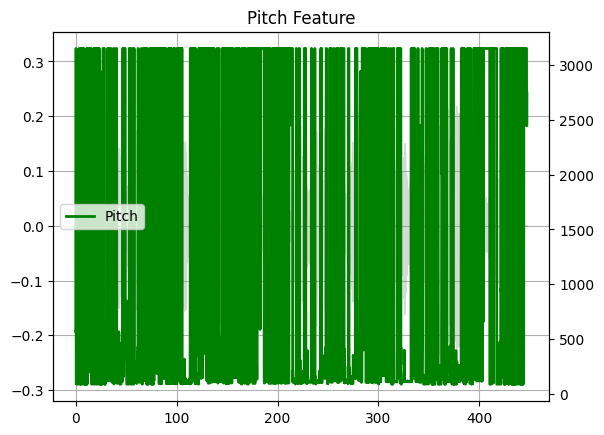

In [7]:
plot_pitch(waveform[0], sample_rate[0], pitch)